<a href="https://colab.research.google.com/github/daoowd2020/60-Python-projects/blob/main/Sarcasm_Detection_dawood_after_feutcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DPhi - NLP Bootcamp Datathon - Sarcasm Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk

# 1- Introduction 

# 1.1 Background 

# 1.2 About The data sets which will be used 

# 2. Understanding the Data

In [2]:
import warnings

warnings.filterwarnings('ignore')

### Importing The required python packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk

## 2.1 Reading & Loading data sets¶

In [6]:
df_train = pd.read_csv("https://drive.google.com/file/d/1PLELR7dShBtVa35GqDLKvlheVej-cWrj/view?usp=sharing/train_data.csv")
df_test = pd.read_csv("https://drive.google.com/file/d/1PNsh6UnIC7AnPnqQXKUoLAZ2uOuLq1NV/view?usp=sharing/Test_Data.csv")
df_train.head(10)

ParserError: ignored

## 2.2 Exploring the data set¶

In [ ]:
df_train.shape

(44262, 2)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44262 entries, 0 to 44261
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      44262 non-null  object
 1   is_sarcastic  44262 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 691.7+ KB


In [ ]:
df_train.describe()

,is_sarcastic
count,44262.000000
mean,0.458723
std,0.498299
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df_train.value_counts().sum()

44262

In [ ]:
df_train.isnull().value_counts()

headline  is_sarcastic
False     False           44262
dtype: int64

In [ ]:
df_train.is_sarcastic.value_counts()

0    23958
1    20304
Name: is_sarcastic, dtype: int64

In [ ]:
df_train.is_sarcastic.value_counts(normalize=True)

0    0.541277
1    0.458723
Name: is_sarcastic, dtype: float64

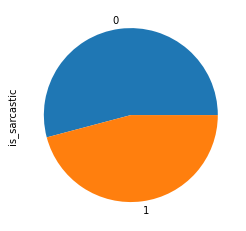

In [ ]:
#sns.countplot(df['is_sarcastic'])
df_train.is_sarcastic.value_counts(normalize=True).plot.pie()
plt.show()

## 3. Data Preparation-Pre-processing text data¶

In [ ]:
import string
string.punctuation
punct= string.punctuation

In [ ]:
import re
#\W+ regex, indicates that it will split wherever it sees one or more non-word characters.
#So that'll split on white spaces, special characters, anything like that.

text='I love NLP,will use python in our code.'
tokens = re.split('\W+', text)
tokens
from nltk.tokenize import word_tokenize
#import nltk
import nltk
from nltk.corpus import stopwords
stopwords_En = nltk.corpus.stopwords.words('english')


In [ ]:
### Create function to remove punctuation, tokenize, remove stopwords, and stem

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
     #tokens = re.split('\W+', text)
    tokens = word_tokenize(text)
    #text = " ".join([ps.stem(word) for word in tokens if word not in stopwords_En])
    text = ' '.join([wn.lemmatize(word) for word in text.split()])
    
    # stopwords removal
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text
df_train=df_train[['headline','is_sarcastic']]
df_train['cleaned_text'] = df_train['headline'].apply(lambda x: clean_text(x))

df_test=df_test[['headline']]
df_test['cleaned_text'] = df_test['headline'].apply(lambda x: clean_text(x))

In [ ]:
df_train.head()

,headline,is_sarcastic,cleaned_text
0,supreme court votes 7-2 to legalize all worldl...,1,supreme court vote 72 legalize worldly vice
1,hungover man horrified to learn he made dozens...,1,hungover man horrified learn made dozen plan l...
2,emily's list founder: women are the 'problem s...,0,emilys list founder woman problem solver congress
3,send your kids back to school with confidence,0,send kid back school confidence
4,watch: experts talk pesticides and health,0,watch expert talk pesticide health


In [ ]:
import nltk
import re

stop_words = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
   # doc = re.sub(r'[^a-zA-Z]',r' ', document)
    doc = re.sub(r'nbsp', r'', doc)
    doc = re.sub(' +', ' ', doc)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    filtered_tokens= [wn.lemmatize(word) for word in filtered_tokens]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

corpus1=df_train['headline']
corpus2=df_test['headline']
normalize_corpus1 = np.vectorize(normalize_document)
normalize_corpus2 = np.vectorize(normalize_document)
new_headline1 = normalize_corpus(corpus1)
new_headline2 = normalize_corpus(corpus2)
#norm_corpus
df_train['new_headline'] = df_train['headline'].apply(lambda x: normalize_document(x.lower()))
df_test['new_headline'] = df_test['headline'].apply(lambda x: normalize_document(x.lower()))

In [ ]:
df_train.head()

,headline,is_sarcastic,cleaned_text,new_headline
0,supreme court votes 7-2 to legalize all worldl...,1,supreme court vote 72 legalize worldly vice,supreme court vote 72 legalize worldly vice
1,hungover man horrified to learn he made dozens...,1,hungover man horrified learn made dozen plan l...,hungover man horrified learn made dozen plan l...
2,emily's list founder: women are the 'problem s...,0,emilys list founder woman problem solver congress,emilys list founder woman problem solver congress
3,send your kids back to school with confidence,0,send kid back school confidence,send kid back school confidence
4,watch: experts talk pesticides and health,0,watch expert talk pesticide health,watch expert talk pesticide health


In [ ]:
df_test.head()

,headline,cleaned_text,new_headline
0,area stand-up comedian questions the deal with...,area standup comedian question deal drivethru ...,area standup comedian question deal drivethru ...
1,dozens of glowing exit signs mercilessly taunt...,dozen glowing exit sign mercilessly taunt mult...,dozen glowing exit sign mercilessly taunt mult...
2,perfect response to heckler somewhere in prop ...,perfect response heckler somewhere prop comedi...,perfect response heckler somewhere prop comedi...
3,gop prays for ossoff lossoff,gop prays ossoff lossoff,gop prays ossoff lossoff
4,trevor noah says the scary truth about trump's...,trevor noah say scary truth trump rumored love...,trevor noah say scary truth trump rumored love...


In [ ]:
df_test.isnull().sum()

headline        0
cleaned_text    0
new_headline    0
dtype: int64

# 4. Vectorizing text data TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
#tfidf = TfidfVectorizer(min_df=1)
tfidf = TfidfVectorizer( ngram_range=(1,1))
features_tfidf = tfidf.fit_transform(df_train['cleaned_text'])
print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)
features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf.get_feature_names()
features_tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
#tfidf = TfidfVectorizer(min_df=1)
tfidf = TfidfVectorizer( ngram_range=(1,1))
features_tfidf = tfidf.fit_transform(df_train['cleaned_text'])
print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)
features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf.get_feature_names()
features_tfidf


(44262, 25192)
Sparse Matrix :
   (0, 24063)	0.3653518284793476
  (0, 24880)	0.4921008171504763
  (0, 13002)	0.4317780888087405
  (0, 672)	0.4240221508871343
  (0, 24218)	0.29805611004469873
  (0, 5477)	0.2813309927817895
  (0, 21972)	0.3002384927583164
  (1, 15358)	0.3034613181724768
  (1, 12867)	0.28172864312909685
  (1, 16979)	0.27709966494777993
  (1, 7068)	0.3581580234620887
  (1, 13612)	0.2998915046754105
  (1, 12959)	0.3595344153352317
  (1, 10948)	0.3980765126804223
  (1, 13727)	0.19070583225115964
  (1, 11107)	0.4576519104514653
  (2, 5112)	0.30299181479990983
  (2, 21000)	0.48728598752412705
  (2, 17637)	0.31810829550356046
  (2, 24822)	0.2143992178723411
  (2, 9056)	0.4076536422079261
  (2, 13244)	0.3306645803718914
  (2, 7595)	0.49806410984584526
  (3, 5076)	0.5618642544312047
  (3, 19769)	0.3796861863869382
  :	:
  (44258, 3848)	0.4303976044427548
  (44258, 23965)	0.38948103315843635
  (44258, 19685)	0.2400718606672251
  (44258, 2560)	0.3676448256040375
  (44258, 22979)	0.

MemoryError: Unable to allocate 8.31 GiB for an array with shape (44262, 25192) and data type float64

In [ ]:
features_tfidf.head()

AttributeError: head not found

# 5. Feature Engineering

df_train_sentiment_features = df_train['new_headline'].apply(lambda row: textblob.TextBlob(row).sentiment)
df_train['Polarity'] = [obj.polarity for obj in df_train_sentiment_features.values]
df_train['Subjectivity'] = [obj.subjectivity for obj in df_train_sentiment_features.values]

df_test_sentiment_features = df_test['headline'].apply(lambda row: textblob.TextBlob(row).sentiment)
df_test['Polarity'] = [obj.polarity for obj in df_test_sentiment_features.values]
df_test['Subjectivity'] = [obj.subjectivity for obj in df_test_sentiment_features.values]

In [ ]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round( count/(len(text) - text.count(" ")),3)*100

df_train['body_len'] = df_train['headline'].apply(lambda x: len(x) - x.count(" "))
df_train['punct%'] = df_train['headline'].apply(lambda x: count_punct(x))
df_train.head()

,headline,is_sarcastic,cleaned_text,new_headline,body_len,punct%
0,supreme court votes 7-2 to legalize all worldl...,1,supreme court vote 72 legalize worldly vice,supreme court vote 72 legalize worldly vice,45,2.2
1,hungover man horrified to learn he made dozens...,1,hungover man horrified learn made dozen plan l...,hungover man horrified learn made dozen plan l...,55,0.0
2,emily's list founder: women are the 'problem s...,0,emilys list founder woman problem solver congress,emilys list founder woman problem solver congress,56,7.1
3,send your kids back to school with confidence,0,send kid back school confidence,send kid back school confidence,38,0.0
4,watch: experts talk pesticides and health,0,watch expert talk pesticide health,watch expert talk pesticide health,36,2.8


In [ ]:
import string

df_train['char_count'] = df_train['headline'].apply(len)
df_train['word_count'] = df_train['headline'].apply(lambda x: len(x.split()))
df_train['word_density'] = df_train['char_count'] / (df_train['word_count']+1)
df_train['punctuation_count'] = df_train['headline'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
df_train['title_word_count'] = df_train['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
df_train['upper_case_word_count'] = df_train['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))




In [ ]:
df_test['char_count'] = df_test['headline'].apply(len)
df_test['word_count'] = df_test['headline'].apply(lambda x: len(x.split()))
df_test['word_density'] = df_test['char_count'] / (df_test['word_count']+1)
df_test['punctuation_count'] = df_test['headline'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
df_test['title_word_count'] = df_test['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
df_test['upper_case_word_count'] = df_test['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [ ]:
df_train.head()

,headline,is_sarcastic,cleaned_text,new_headline,body_len,punct%,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
0,supreme court votes 7-2 to legalize all worldl...,1,supreme court vote 72 legalize worldly vice,supreme court vote 72 legalize worldly vice,45,2.2,53,9,5.300000,1,0,0
1,hungover man horrified to learn he made dozens...,1,hungover man horrified learn made dozen plan l...,hungover man horrified learn made dozen plan l...,55,0.0,66,12,5.076923,0,0,0
2,emily's list founder: women are the 'problem s...,0,emilys list founder woman problem solver congress,emilys list founder woman problem solver congress,56,7.1,65,10,5.909091,4,0,0
3,send your kids back to school with confidence,0,send kid back school confidence,send kid back school confidence,38,0.0,45,8,5.000000,0,0,0
4,watch: experts talk pesticides and health,0,watch expert talk pesticide health,watch expert talk pesticide health,36,2.8,41,6,5.857143,1,0,0


In [ ]:
df_train.describe()

,is_sarcastic,body_len,punct%,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
count,44262.000000,44262.000000,44262.000000,44262.000000,44262.000000,44262.000000,44262.000000,44262.0,44262.0
mean,0.458723,52.668768,2.087203,61.618860,9.947856,5.629592,1.094460,0.0,0.0
std,0.498299,17.212947,2.488937,20.158453,3.303905,0.824368,1.302318,0.0,0.0
min,0.000000,6.000000,0.000000,7.000000,2.000000,2.333333,0.000000,0.0,0.0
25%,0.000000,41.000000,0.000000,48.000000,8.000000,5.083333,0.000000,0.0,0.0
50%,0.000000,53.000000,1.600000,62.000000,10.000000,5.600000,1.000000,0.0,0.0
75%,1.000000,63.000000,3.400000,74.000000,12.000000,6.142857,2.000000,0.0,0.0
max,1.000000,776.000000,30.000000,926.000000,151.000000,12.000000,28.000000,0.0,0.0


## 5.4 Rescaling the Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
num_vars = ['body_len','punct%','word_count','word_density','punctuation_count','title_word_count','upper_case_word_count']
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train[num_vars].head()

,body_len,punct%,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
0,0.050649,0.073333,0.046980,0.306897,0.035714,0.0,0.0
1,0.063636,0.000000,0.067114,0.283820,0.000000,0.0,0.0
2,0.064935,0.236667,0.053691,0.369906,0.142857,0.0,0.0
3,0.041558,0.000000,0.040268,0.275862,0.000000,0.0,0.0
4,0.038961,0.093333,0.026846,0.364532,0.035714,0.0,0.0


## Model bulding

## 6.2 Final data frame to use it in the Model

In [ ]:
target= df_train['is_sarcastic']

#final_df=df_train.drop(['headline', 'new_headline', 'cleaned_text','is_sarcastic'], axis=1)

In [ ]:
x = df_train['new_headline']
#df_train=df_train.drop['is_sarcastic','cleaned_text','headline']
#x2= df_test['new_headline2']

In [ ]:
# Create a bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer
cv = TfidfVectorizer()
#cv=CountVectorizer()
bow1 = cv.fit_transform(x)
#bow = np.array(bow.todense())
final_df=df_train.drop(['headline', 'new_headline', 'cleaned_text','is_sarcastic'], axis=1)


In [ ]:
#target= df_train['is_sarcastic']

In [ ]:
final_df.head()

,body_len,punct%,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
0,0.050649,0.073333,53,0.046980,0.306897,0.035714,0.0,0.0
1,0.063636,0.000000,66,0.067114,0.283820,0.000000,0.0,0.0
2,0.064935,0.236667,65,0.053691,0.369906,0.142857,0.0,0.0
3,0.041558,0.000000,45,0.040268,0.275862,0.000000,0.0,0.0
4,0.038961,0.093333,41,0.026846,0.364532,0.035714,0.0,0.0


In [ ]:
final_df = pd.concat([final_df, pd.DataFrame(bow1)], axis=1)

In [ ]:
final_df

,body_len,punct%,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,0
0,0.050649,0.073333,53,0.046980,0.306897,0.035714,0.0,0.0,"(0, 24068)\t0.3653518284793476\n (0, 24886)..."
1,0.063636,0.000000,66,0.067114,0.283820,0.000000,0.0,0.0,"(0, 15364)\t0.3034613181724768\n (0, 12877)..."
2,0.064935,0.236667,65,0.053691,0.369906,0.142857,0.0,0.0,"(0, 5116)\t0.30299181479990983\n (0, 21005)..."
3,0.041558,0.000000,45,0.040268,0.275862,0.000000,0.0,0.0,"(0, 5080)\t0.5618642544312047\n (0, 19776)\..."
4,0.038961,0.093333,41,0.026846,0.364532,0.035714,0.0,0.0,"(0, 10519)\t0.36615789703089635\n (0, 16751..."
...,...,...,...,...,...,...,...,...,...
44257,0.045455,0.000000,48,0.040268,0.310345,0.000000,0.0,0.0,"(0, 18322)\t0.501446310561246\n (0, 9946)\t..."
44258,0.053247,0.000000,54,0.040268,0.379310,0.000000,0.0,0.0,"(0, 9747)\t0.5988249079618629\n (0, 23970)\..."
44259,0.083117,0.000000,80,0.060403,0.448276,0.000000,0.0,0.0,"(0, 7474)\t0.4857924594516143\n (0, 17094)\..."
44260,0.040260,0.000000,43,0.033557,0.314655,0.000000,0.0,0.0,"(0, 15843)\t0.5678698270937518\n (0, 9794)\..."


## Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
X = bow1
y = df_train['is_sarcastic']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state = 12)

### Building ML Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_jobs=-1)
model1.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

### Evaluate the model

In [ ]:
#test_data=bow2
#bow2 = cv.fit_transform(x2)
#data = cv.transform(df_test['headline']).toarray()
y_pred=model1.predict(X_test)

In [ ]:
y_test.values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model1.predict(X_train)))
print('Test accuracy', accuracy_score(y_test,model1.predict(X_test)))

Training accuracy... 0.9999717585924482
Test accuracy 0.9094092398057155


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[4510,  256],
       [ 546, 3541]], dtype=int64)

 ## Execute this model of test_data

In [ ]:
#y_pred_test=model1.predict(x2)
data = cv.transform(df_test['new_headline2']).toarray()
y_pred_test=model1.predict(data)

KeyError: 'new_headline2'

In [ ]:
y_pred_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
df = pd.DataFrame(y_pred_test, columns=['prediction'])
df.to_csv('e:y_pred_test.csv',index=False)